### **공통 라이브러리 및 드라이브 연동**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import matplotlib.pyplot as plt 
import math
import cv2
impath = '/content/drive/My Drive/Colab Notebooks/Image_processing/image/house.bmp'
impath3 = '/content/drive/My Drive/Colab Notebooks/Image_processing/image/checkerboard.jpg'

Mounted at /content/drive


### **1번 Design SUSAN/Moravec/Harris corner detector**



> **SUSAN corner detector**



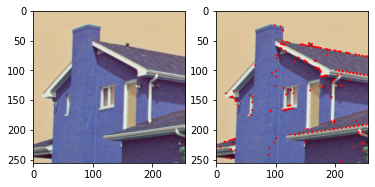

In [ ]:
def Susan(image):
    mask = np.array([[0,0,1,1,1,0,0],[0,1,1,1,1,1,0],[1,1,1,1,1,1,1],[1,1,1,1,\
                    1,1,1],[1,1,1,1,1,1,1],[0,1,1,1,1,1,0],[0,0,1,1,1,0,0]]) #Susan Mask
    col,row = image.shape
    image = np.pad(image, 3 ,'reflect') #Mask 크기에 맞춰 convolution을 위해 padding
    image = np.array(image,dtype='int64') #overflow 방지 형 변환
    usan = np.zeros((col,row))
    susan = np.zeros((col,row))
    t1,t2,q = 12, 27.75, 27.75
    for i in range(col):
        for j in range(row):
            s = np.abs(image[i:i+7,j:j+7]-image[i+3][j+3]) #s = abs(f(r)-f(r0))
            s = s*mask #원형 화소 내에서만 취급 
            s = np.where(s <= t1, 1, 0) # t1보다 작거나 같으면 1 아니면 0
            usan[i][j] = np.sum(s)
            if (usan[i][j] <= t2):
                susan[i][j] = q - usan[i][j] #Corner map
    susan = cv2.dilate(susan,None) #Corner 표시가 더 잘보이게 하기 위해 팽창
    return susan
image = cv2.imread(impath) #image read
imgray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.subplot(1,2,1)
plt.imshow(image)
susan = Susan(imgray)
image[susan>=susan.max()*0.93] = [255,0,0] #Corner map 19퍼 추출 후 빨간 점으로
plt.subplot(1,2,2)
plt.imshow(image)

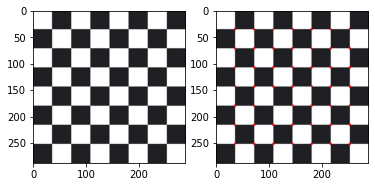

In [ ]:
image = cv2.imread(impath3) #image read
imgray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.subplot(1,2,1)
plt.imshow(image)
susan = Susan(imgray)
image[susan>=susan.max()*0.93] = [255,0,0]
plt.subplot(1,2,2)
plt.imshow(image)

> **Moravec corner detector**

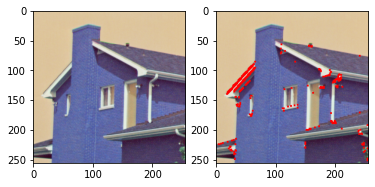

In [ ]:
def Moravec(image):
    col,row = image.shape
    image = np.pad(image, 1 ,'reflect') # convolution을 위해 padding
    image = np.array(image,dtype='int64')
    c = np.zeros((col,row))
    s = np.zeros((3,3)) #mask size
    for i in range(col):
        for j in range(row):
            for v in range(3):
                for u in range(3):
                    s[v][u] = np.sum((image[i+v][j+u]-image[i][j])**2) # s 계산
            c[i][j] = min(s[0][1],s[1][0],s[1][2],s[2][1]) # Corner map
    c = cv2.dilate(c,None) #Corner 표시가 더 잘보이게 하기 위해 팽창
    return c
image = cv2.imread(impath) #image read
imgray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.subplot(1,2,1)
plt.imshow(image)
moravec = Moravec(imgray)
image[moravec>moravec.max()*0.08] = [255,0,0]
plt.subplot(1,2,2)
plt.imshow(image)

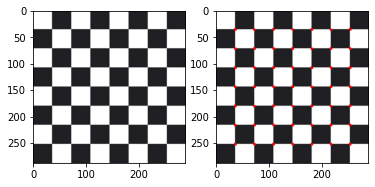

In [ ]:
image = cv2.imread(impath3) #image read
imgray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.subplot(1,2,1)
plt.imshow(image)
moravec = Moravec(imgray)
image[moravec >= moravec.max() * 0.06] = [255,0,0]
plt.subplot(1,2,2)
plt.imshow(image)

> **Harris corner detector**

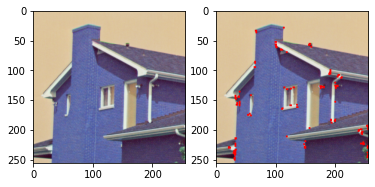

In [ ]:
def conv(image,mask):
    col,row = image.shape
    image = np.pad(image,1,'reflect')
    conv = np.zeros((col,row))
    for i in range(col):
        for j in range(row):
            conv[i][j] =  np.sum(image[i:i+3,j:j+3]*mask)
    return conv

def Harris(image):
    col,row = image.shape
    mx = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
    my = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])
    G = np.random.normal(0,25,3*3) 
    G = G.reshape(3,3)/np.sum(G)
    dx,dy = conv(image,mx),conv(image,my) #convolution
    a0,a1,a2 = conv(dx**2,G),conv(dx*dy,G),conv(dy**2,G)
    A = np.array([[a0, a1],[a1,a2]]) # 행렬 A
    c = np.zeros((col,row))
    k = 0.04
    for i in range(col):
        for j in range(row):
            p,q,r = A[0,0,i,j],A[1,1,i,j],A[0,1,i,j]
            det = (p*q)-(r*r) #det(A)
            trace = p+q #trace(A)
            c[i][j] = det - (k * (trace**2)) #Corner map
    c = cv2.dilate(c,None) #Corner 표시가 더 잘보이게 하기 위해 팽창
    return c

image = cv2.imread(impath) #image read
plt.subplot(1,2,1)
plt.imshow(image)
imgray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
harris = Harris(imgray)
image[harris > harris.max() * 0.02] = [255,0,0]
plt.subplot(1,2,2)
plt.imshow(image)


> opencv Harris




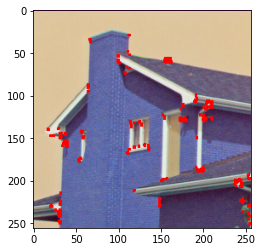

In [ ]:
import cv2  
import numpy as np  
  
image = cv2.imread(impath) #image read
img2 = image.copy()
imgray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

imgray = np.float32(imgray)
dst = cv2.cornerHarris(imgray, 2, 3, 0.04)
dst = cv2.dilate(dst, None)

img2[dst > 0.02*dst.max()] = [255, 0, 0]

plt.imshow(img2)

### **2번 Design morphological thinning process as below**

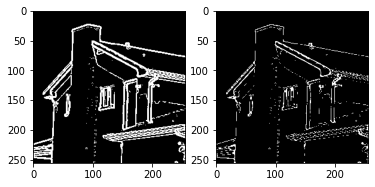

In [ ]:
def sobel_gradient_dx(image):
    mx = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])   #sobel filter dx
    col, row = image.shape
    image = np.pad(image,1 ,'reflect')  #convolution을 위해 image padding
    dx = np.zeros((col,row))
    for i in range(col):
        for j in range(row):
            dx[i][j] = np.sum(image[i:i+3,j:j+3]*mx) #convolution
    return dx
def sobel_gradient_dy(image):
    my = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]]) #sobel filter dy
    col, row = image.shape
    image = np.pad(image,1,'reflect')  #convolution을 위해 image padding
    dy = np.zeros((col,row))
    for i in range(col):
        for j in range(row):
            dy[i][j] = np.sum(image[i:i+3,j:j+3]*my)   #convolution
    return dy
def strength(dx,dy):
    mag = np.sqrt(dx**2+dy**2)   #구하는 식         
    return mag
def final_edge(magnitude,threshold):
    col, row = magnitude.shape
    final = np.zeros((col,row),dtype='uint8')
    for i in range(col):
        for j in range(row):
            if(magnitude[i][j]>threshold): #threshold값보다 크면 255
                final[i][j]=255
            else:                          #작으면 0
                final[i][j]=0
    return final

def Morphology(bin):
    col,row = bin.shape
    eout = np.array(bin)
    for i in range(1,col-2):
        for j in range(1,row-2):
            p = bin[i][j]
            n0,n1,n2,n3 = bin[i][j+1],bin[i+1][j+1],bin[i+1][j],bin[i+1][j-1]
            n4,n5,n6,n7 = bin[i][j-1],bin[i-1][j-1],bin[i-1][j],bin[i-1][j+1]
            if(p and ((not n0 and (n4 and (n5 or n6 or n2 or n3) and (n6 or not n7)and(n2 or not n1)))\
            or (not n4 and (n0 and (n1 or n2 or n6 or n7) and (n2 or not n3) and (n6 or not n5)))\
            or (not n2 and (n6 and (n7 or n0 or n4 or n5) and (n0 or not n1) and (n4 or not n3)))\
            or (not n6 and (n2 and (n3 or n4 or n0 or n1) and (n4 or not n5) and (n0 or not n7))))):
               eout[i][j] = 0
    return eout
image = cv2.imread(impath, cv2.IMREAD_GRAYSCALE) #image read
dx,dy = sobel_gradient_dx(image),sobel_gradient_dy(image)
mag = strength(dx,dy)
final = final_edge(mag,100)
morphology = Morphology(final)
plt.subplot(1,2,1)
plt.imshow(final,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(morphology,cmap='gray')



### **3번 Design a part of SIFT method**

In [1]:
def conv(image,mask):
    col,row = image.shape
    image = np.pad(image,1,'reflect')
    conv = np.zeros((col,row))
    for i in range(col):
        for j in range(row):
            conv[i][j] =  np.sum(image[i:i+3,j:j+3]*mask)
    return conv

def SIFT(image):
    G = np.random.normal(0,1.6,3*3)
    G = G.reshape(3,3)/np.sum(G)
    G = G.astype('uint8')
    gimg = conv(image,G)
    plt.imshow(gimg,cmap='gray')
image = cv2.imread(impath, cv2.IMREAD_GRAYSCALE) #image read
SIFT(image)

NameError: ignored